In [61]:
import pandas as pd
import numpy as np

In [16]:
df = pd.read_csv('dataset_tmc.csv', parse_dates = ['Dates'], date_format = '%d/%m/%y')
df.columns = [i.lower() for i in df.columns]
df.columns = [i.replace(' ','_') for i in df.columns]
df = df.set_index('dates')

# Check NaNs
if df.isna().sum().sum() != 0:
    print('check NaNs in data')

# Drop Sat&Sun if any
df = df[df.index.dayofweek<5]

# as convention 2 weeks is 10 trading days, 1 month is 21 trading days so that each year has 252 trading days


In [18]:
for security_id in df.columns[:1]:
    

us_staples


In [141]:
def meanrev_signal(s,
                   long_params={10:0.05, 21:0.15, 63:0.25},
                   short_params={10:0.95, 21:0.85, 63:0.75},
                   ma_fast_wdw = 20,
                   ma_slow_wdw = 60
                   ):

    # long signal 1
    signal_long1 = pd.DataFrame()

    for k,v in long_params.items():
        signal_long1[f'qtle_px{k}'] = s.rolling(k).quantile(v)

    signal_long1 = (s < signal_long1.min(axis=1)) * 1 

    # short signal 1
    signal_short1 = pd.DataFrame()

    for k,v in short_params.items():
        signal_short1[f'qtle_px{k}'] = s.rolling(k).quantile(v)

    signal_short1 = (s > signal_short1.max(axis=1)) * -1

    
    ma_fast = s.rolling(ma_fast_wdw).mean()
    ma_slow = s.rolling(ma_slow_wdw).mean()
    
    # long signal 2
    signal_long2 = ((s > ma_fast) & (s > ma_slow)) * 1 # vado long se prezzo maggiore di entrambe medie mobili???

    # short signal 2
    signal_short2 = ((s < ma_fast) & (s < ma_slow)) * 1 # vado short se prezzo minore di entrambe medie mobili???

    # make intersection of the two signals
    signal_long = signal_long1 * signal_long2
    signal_short = signal_short1 * signal_short2

    return signal_long, signal_short




In [142]:
signal_long, signal_short = meanrev_signal(df[security_id])

In [144]:
signal_long

dates
2013-02-12    0
2013-02-13    0
2013-02-14    0
2013-02-15    0
2013-02-18    0
             ..
2024-02-06    0
2024-02-07    0
2024-02-08    0
2024-02-09    0
2024-02-12    0
Length: 2870, dtype: int64

<Axes: xlabel='dates'>

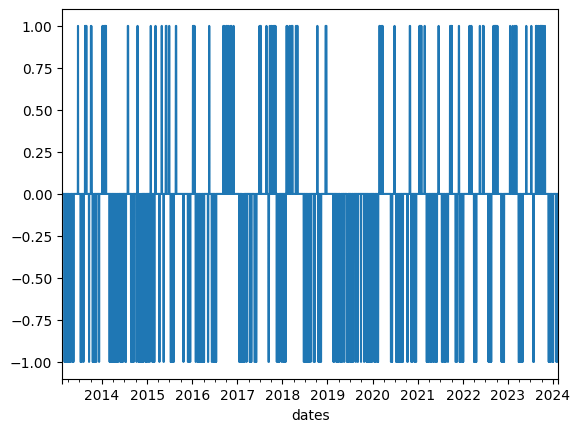

In [68]:
(entry_longs + entry_shorts).plot()

In [66]:
entry_shorts

dates
2013-02-12    0
2013-02-13    0
2013-02-14    0
2013-02-15    0
2013-02-18    0
             ..
2024-02-06    0
2024-02-07    0
2024-02-08    0
2024-02-09    0
2024-02-12    0
Length: 2870, dtype: int64